# Анализ данных abalone
В текущем блокноте проводится анализ данных датафрейма abalone. Основная задача - на основе имеющихся данных определить возраст морского ушка. Имеются следующие атрибуты:

`Sex` - nominal - M, F, and I (infant)

`Length` - continuous - mm - Longest shell measurement

`Diameter` - continuous - mm - perpendicular to length

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried

`Rings` - integer - +1.5 gives the age in years (target)

# Импорт датафрейма и необходимых библиотек

In [4]:
import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv')

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Анализ данных

In [7]:
print(f'Размер датасета составляет {df.shape[0]} строк, {df.shape[1]} столбцов.')

Размер датасета составляет 4177 строк, 9 столбцов.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


- Видно, что в столбцах Diameter, Whole weight и Shell weight есть пропущенные значения;
- Название столбцов лучше переименовать для дальнейшего использования;
- Типы данных выбраны корректно, изменять не требуется.

Заменим пустые значения медианой в столбцах.

In [9]:
median_diameter = df[~df['Diameter'].isnull()]['Diameter'].median()
median_Whole_weight = df[~df['Whole weight'].isnull()]['Whole weight'].median()
median_Shell_weight = df[~df['Shell weight'].isnull()]['Shell weight'].median()

df['Diameter'].fillna(median_diameter, inplace=True)
df['Whole weight'].fillna(median_Whole_weight, inplace=True)
df['Shell weight'].fillna(median_Shell_weight, inplace=True)

In [10]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


Дублирующие строки в нашем датафрейме отсутствуют. Переименуем наименования столбцов для дальнейшего использования.

In [11]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [12]:
# С помощью цикла сделаем так, чтобы все наименования были с маленькой буквы, между двумя словами был знак "-".
for i in df.columns:
    if ' ' in i:
        df['_'.join(i.lower().split())] = df[i]
    df[i.lower()] = df[i]
    
for i in df.columns:
    if i != i.lower() or ' ' in i: 
        df.drop(i, axis=1, inplace=True)

# Визуализация данных
Построим по каждому столбцу график и визуально посмотрим на данные

<AxesSubplot:xlabel='sex', ylabel='sex_counts'>

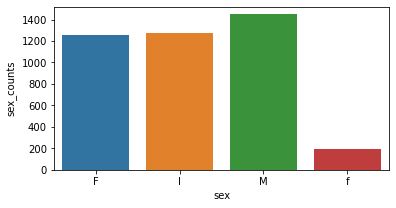

In [13]:
sex = df.groupby('sex', as_index=False) \
    .agg({'rings': 'count'}) \
    .rename(columns={'rings': 'sex_counts'})


plt.figure(figsize=(6, 3))
sns.barplot(data=sex, x=sex['sex'], y=sex['sex_counts'])

По всей видимости в данных допущена ошибка, так как мы знаем, что у нас должно быть 3 группы в атрибуте `sex`. Отнесём данные по f к F

In [14]:
df.loc[df['sex'] == 'f', 'sex'] = 'F'

<AxesSubplot:xlabel='sex', ylabel='sex_counts'>

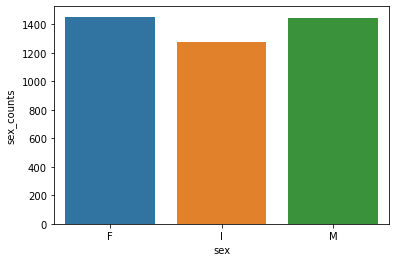

In [15]:
sex = df.groupby('sex', as_index=False) \
    .agg({'rings': 'count'}) \
    .rename(columns={'rings': 'sex_counts'})


sns.barplot(data=sex, x=sex['sex'], y=sex['sex_counts'])

В датафрейме почти равное количество строк по каждой группе.

In [16]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.408246,0.139516,0.826623,0.359367,0.180594,0.239023,9.933684
std,0.120093,0.098137,0.041827,0.484521,0.221963,0.109614,0.138108,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.447500,0.186000,0.093500,0.131500,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.141500,0.502000,0.253000,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Описание числовых значений. Видно, что максимальное `rings` равно 29, медиана равна 9 и минимальное 1. У `height` максимальное значение 1.13, хотя значени кватиля 75 всего 0.165. Похоже на выброс.

<AxesSubplot:xlabel='length', ylabel='Count'>

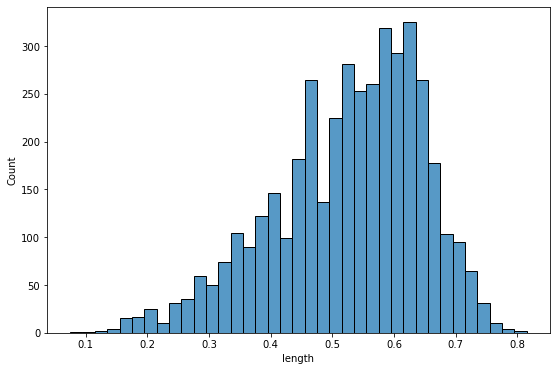

In [17]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='length')

На графике по `length` видно, что большинство наблюдений легли в промежутке 0.45 - 0.7

<AxesSubplot:xlabel='diameter', ylabel='Count'>

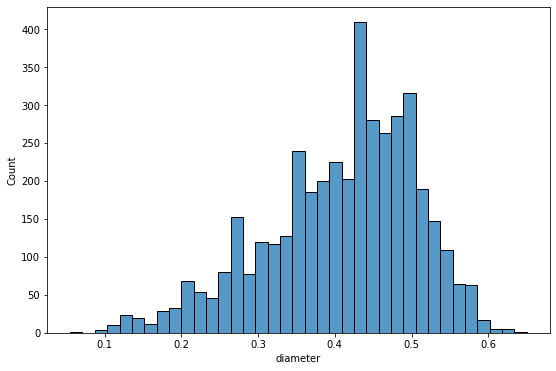

In [18]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='diameter')

На графике `diametr` видно, что есть заметное большинство в значении 0.42

<AxesSubplot:xlabel='height', ylabel='Count'>

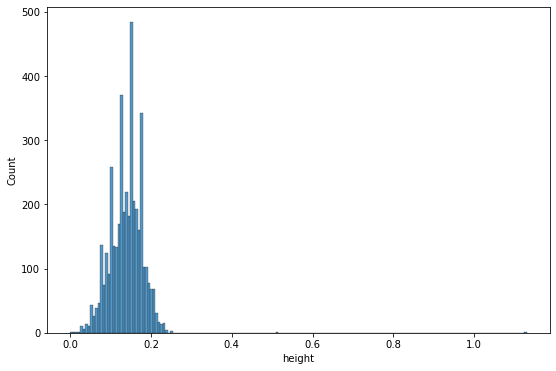

In [19]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='height')

Как и писал ранее, есть заметный выброс `height`, который лёг после 1. Возможно его следует удалить, так как данное наблюдение будет зашумлять прогноз. Но это не точно.

<AxesSubplot:xlabel='whole_weight', ylabel='Count'>

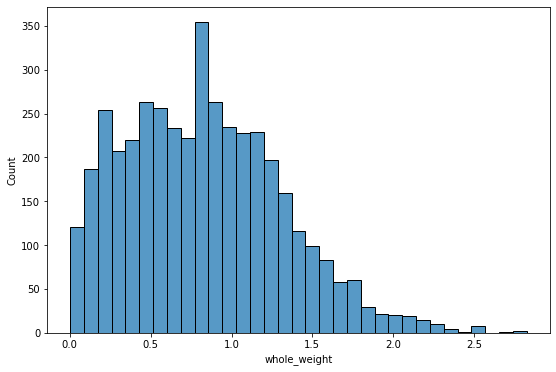

In [20]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='whole_weight')

По `whole weight` видно, что чем больше значение увеличивается, тем реже встречаются наблюдения.

<AxesSubplot:xlabel='shucked_weight', ylabel='Count'>

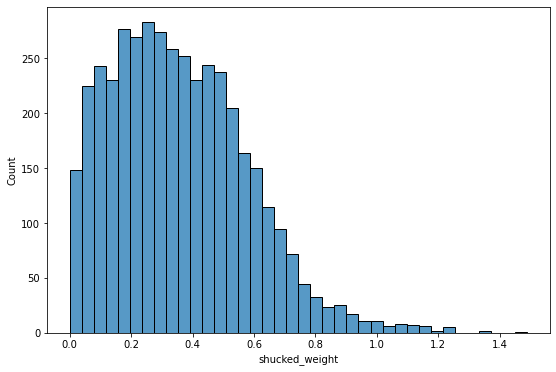

In [21]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='shucked_weight')

По `shucked_weight` видно, что чем больше значение увеличивается, тем реже встречаются наблюдения.

<AxesSubplot:xlabel='viscera_weight', ylabel='Count'>

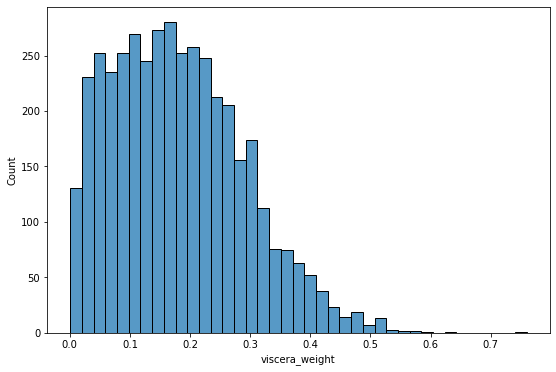

In [22]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='viscera_weight')

<AxesSubplot:xlabel='shell_weight', ylabel='Count'>

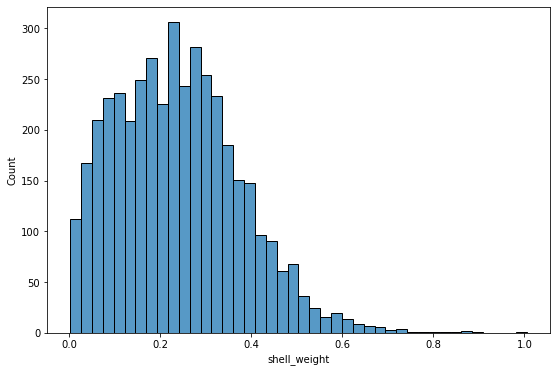

In [23]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='shell_weight')

По последним двум графикам такая же ситуация. Чем больше растет значение, тем ниже встречаются наблюдения.

In [30]:
df[df.height == df.height.max()]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
2051,F,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,8


Интересно было посмотреть на наблюдение с максимальной высотой. Всё таки склоняюсь, что значение неверное.

<AxesSubplot:xlabel='rings', ylabel='Count'>

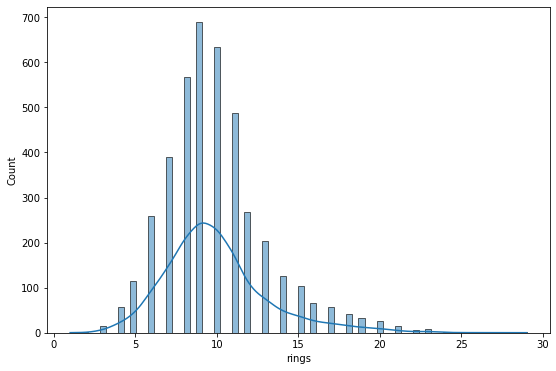

In [25]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='rings', kde=True)

По графику `rings` видно, что распределение нормальное. Большинство наблюдений собрались вокруг среднего значения.

<AxesSubplot:xlabel='rings'>

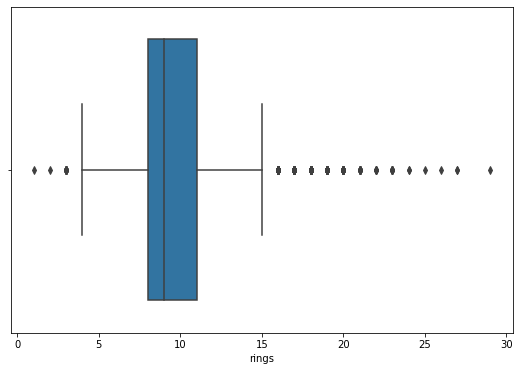

In [27]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="rings")

Так же, судя по боксплоту, видны выбросы у `rings`. Возможно это будет проблемой, так как будем мы прогнозировать имеено `rings`. Но это не точно.

<AxesSubplot:>

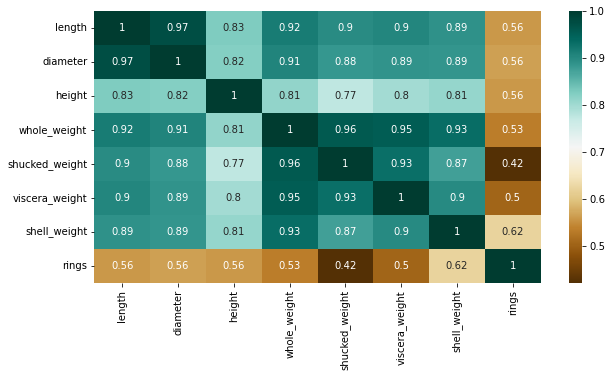

In [31]:
plt.figure(figsize=(10, 5))
corr = df.corr()
sns.heatmap(corr, cmap='BrBG', annot=True)

Мы видим, что почти всё между собой сильно коррелирует, кроме нашей цели.

In [32]:
from scipy.stats import f_oneway

In [34]:
CategoryGroupLists = df.groupby('sex')['rings'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.35303895865748e-182


In [35]:
if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

Features are correlated


One-Way ANOVA (однофакторный анализ дисперсии) - используется для сравнения средних значений двух или более групп, которые связаны с одним категориальным фактором. В нашем примере 3 группы по атрибуту `sex`. Связь есть между гендером и возврастом морского ушка.

# Вывод

Из анализа данных можно сказать, что данные в каком-то смысле идеальные для прогнозирования, несмотря на мелкие выбросы в `rings` и `height`. У целевой переменной нормальное распределение. Корреляция средняя со всеми атрибутами, примерно 0.5 - 0.6.

# Сравнение Pandas с Polars

In [38]:
df_big = df.copy()

Увеличим наш датасет до 1_000_000 строк.

In [39]:
for i in range(250):
    df_big = pd.concat([df_big, df])

df_big.shape

(1048427, 9)

In [40]:
df_big.to_csv('abalone_big_df.csv', index=False)

In [41]:
%%time
df_pl = pl.read_csv('abalone_big_df.csv')

CPU times: total: 1.36 s
Wall time: 451 ms


In [42]:
%%time
df_pd = pd.read_csv('abalone_big_df.csv')

CPU times: total: 1.62 s
Wall time: 1.62 s


Загрузка данных у Polars быстрее.

In [46]:
%%time
df_pl.filter(pl.col('rings') < 10.5)

CPU times: total: 31.2 ms
Wall time: 48.6 ms


sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
"""I""",0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
"""M""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
"""M""",0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10
"""F""",0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,10
"""F""",0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,10


In [48]:
%%time
df_pd[df_pd['rings'] < 10.5]

CPU times: total: 93.8 ms
Wall time: 69.7 ms


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
1048420,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
1048421,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
1048423,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1048424,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Фтльтрация быстрее у Polars

In [52]:
%%time
df_pl.group_by('sex').agg(pl.mean('rings'))

CPU times: total: 156 ms
Wall time: 48.6 ms


sex,rings
str,f64
"""I""",7.872257
"""F""",11.001376
"""M""",10.678645


In [51]:
%%time
df_pd.groupby('sex', as_index=False).agg({'rings': 'mean'})

CPU times: total: 125 ms
Wall time: 139 ms


,sex,rings
0,F,11.001376
1,I,7.872257
2,M,10.678645


Polars как-будто быстрее агрегирует данные, но с каждым выполнением время разное. Несколько раз Pandas был быстрее.